In [20]:
import nltk
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
import string
import matplotlib.pyplot as plt
from nltk import pos_tag

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download ('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\WA2_TK\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WA2_TK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WA2_TK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WA2_TK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import re
moby_dick = gutenberg.raw('melville-moby_dick.txt')
tokens = word_tokenize(moby_dick)
tokens = [token for token in tokens if token not in string.punctuation]
tokens = [token for token in tokens if not re.match(r"[-'`]|'s'\d", token)]


In [5]:
# Stopwords filtering
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words ]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WA2_TK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:

pos_tags = nltk.pos_tag(filtered_tokens)

# POS frequency
pos_freq = FreqDist([tag[1] for tag in pos_tags])
print(pos_freq)
most_common_pos = pos_freq.most_common(5)
most_common_pos

<FreqDist with 34 samples and 108470 outcomes>


[('NN', 27041), ('JJ', 20512), ('NNP', 10509), ('NNS', 10173), ('RB', 8525)]

In [7]:
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter

# Define a mapping of POS tags from pos_tag to WordNetLemmatizer
pos_tag_mapping = {
    'NNS': 'n',  # Noun, plural
    'VBG': 'v',  # Verb, gerund or present participle
    'NN': 'n',   # Noun, singular or mass
    'VBD': 'v',  # Verb, past tense
    'VBN': 'v',  # Verb, past participle
    'JJ': 'a',   # Adjective
    'VBZ': 'v',  # Verb, 3rd person singular present
    'VBP': 'v',  # Verb, non-3rd person singular present
    'RB': 'r',   # Adverb
    'NNP': 'n',  # Proper noun, singular
    'VB': 'v',   # Verb, base form
    'IN': 'n',   # Preposition or subordinating conjunction
    'PRP': 'n',  # Personal pronoun
    'PRP$': 'n', # Possessive pronoun
    'JJR': 'a',  # Adjective, comparative
    'JJS': 'a',  # Adjective, superlative
    'CD': 'n',   # Cardinal number
    'MD': 'v',   # Modal
    'VBG': 'v',  # Verb, gerund or present participle
    'RBR': 'r',  # Adverb, comparative
    'RBS': 'r',  # Adverb, superlative
    'WP': 'n',   # Wh-pronoun
    'WRB': 'r',  # Wh-adverb
    ':': 'n',    # Colon
    "''": 'n',   # Closing quotation mark
    '``': 'n',   # Opening quotation mark
    'like': 'n', # Inexact numeric modifier
    'POS' : 'n', # Possessive ending
}

# Assuming you have already defined 'pos_tagged_tokens' list

# Extract the top 20 tokens
top_20_tokens = Counter(pos_tags).most_common(20)

# Create a lemmatizer instance
lemmatizer = WordNetLemmatizer()

# Lemmatize the top 20 tokens and remove punctuation
lemmatized_tokens = [lemmatizer.lemmatize(token, pos=pos_tag_mapping[pos]) for (token, pos), count in top_20_tokens if pos in pos_tag_mapping ]

# Print the lemmatized tokens
print(lemmatized_tokens)

['one', 'like', 'upon', 'Ahab', 'man', 'old', 'would', 'whale', 'whale', 'sea', 'though', 'time', 'say', 'ship', 'still', 'yet', 'great', 'must', 'two', 'last']


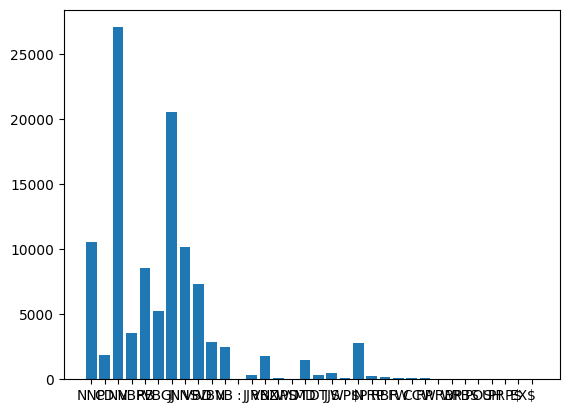

In [8]:
plt.bar(pos_freq.keys(), pos_freq.values())
plt.show()


In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
sentence = sent_tokenize(moby_dick)

# Calculating the sentiment score for each sentence
score = 0
for s in sentence:
    score += sia.polarity_scores(s)['compound']
score = score / len(sentence)
# Determining the overall sentiment
if score > 0.05:
    overall_sentiment = 'positive'
elif score <= 0.05:
    overall_sentiment = 'negative'

print("Average Sentiment Score:", score)
print("Overall Text Sentiment:", overall_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WA2_TK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Sentiment Score: 0.02643698741372306
Overall Text Sentiment: negative
